### SISTEMAS INTELIGENTES II
---

#### K-Means:
Es el algoritmo de aprendizaje automático no supervisado más popular. <br>
Se utiliza para encontrar grupos intrínsecos dentro de un conjunto de datos no etiquetado y extraer inferencias de ellos.<br>
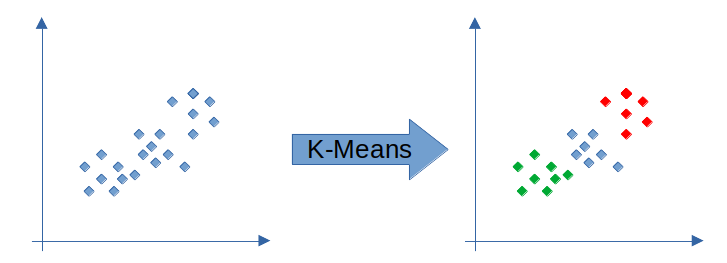

### Centroide: <br>
Un centroide es un punto de datos en el centro de un clúster. <br>
Es un algoritmo iterativo en el que la noción de similitud se deriva de qué tan cerca está un punto de datos del centroide del clúster. <br>
El clustering K-Means funciona de la siguiente manera: <br>
1. El algoritmo de clustering K-Means utiliza un procedimiento iterativo para entregar un resultado final. 
2. El algoritmo requiere el número de clústeres K y el conjunto de datos como entrada. 
3. El conjunto de datos es una colección de características para cada punto de datos. 
4. El algoritmo comienza con estimaciones iniciales para los K centroides. Luego, el algoritmo itera entre los siguientes dos pasos:
    - Asignación de datos: Cada centroide define uno de los clústeres. En este paso, cada punto de datos se asigna a su centroide más cercano, lo cual se basa en la distancia euclidiana al cuadrado. Por lo tanto, si ci es la colección de centroides en el conjunto C, entonces cada punto de datos se asigna a un clúster según la distancia euclidiana mínima.
    - Actualización de centroides: En este paso, los centroides se recalculan y actualizan. Esto se hace tomando la media de todos los puntos de datos asignados al clúster de ese centroide.<br>
    
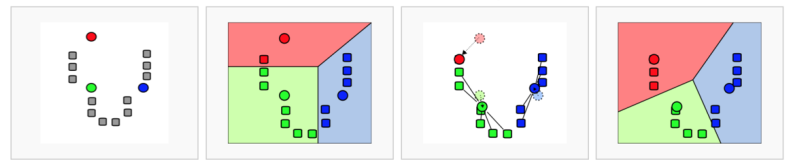

## Caso de estudio

### Dataset:

Trabajaremos con el conjunto de datos "Facebook Live sellers in Thailand" disponible en el Repositorio de Aprendizaje Automático de la Universidad de California Irvine (UCI ML Repo). Este conjunto de datos contiene información sobre vendedores que utilizan transmisiones en vivo en Facebook para vender productos en Tailandia.<br><br>

Los datos recopilados incluyen diversas características, que pueden incluir información demográfica sobre los vendedores (como edad, género, etc.), detalles sobre los productos vendidos, la frecuencia y duración de las transmisiones en vivo, la interacción del público durante las transmisiones, entre otros.

### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline


### Cargar los datos

In [2]:
data = './Live.csv'
df = pd.read_csv(data)

### Análisis exploratorio

In [4]:
print(df.shape)

(7050, 16)


In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### Chequeo de cuántos valores nulos hay

In [8]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [9]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [11]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Explorar las variables categóricas

In [12]:
# Cuántos tipos distintos de variables hay?
print(df['status_id'].unique())
len(df['status_id'].unique())

['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']


6997

In [9]:
# Cuántos tipos distintos de variables hay?
print(df['status_published'].unique())
len(df['status_published'].unique())

['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']


6913

In [14]:
# Cuántos tipos distintos de variables hay?
print(df['status_type'].unique())
print(len(df['status_type'].unique()))

['video' 'photo' 'link' 'status']
4


In [15]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [16]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


## Examinar la correlación entre las variables

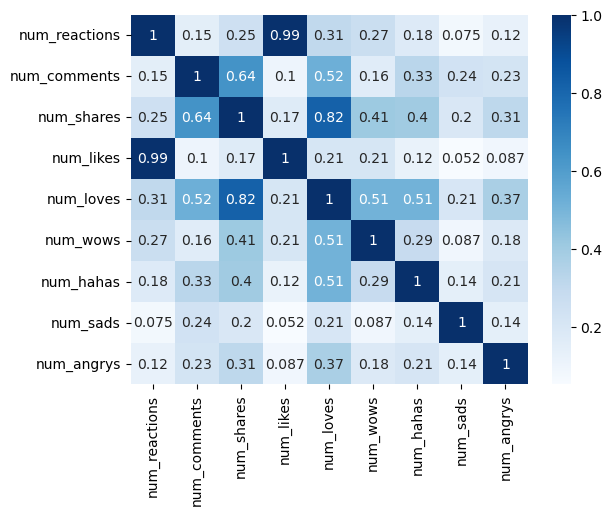

In [13]:
import seaborn as sns

sns.heatmap(df.drop(columns=['status_type'],axis=1).corr(),annot=True,cmap='Blues')
plt.show()

## Decalración del conjunto de características (X) y la variable objetivo (y)

In [17]:
X = df
y = df['status_type']

## Codificar las variables categóricas 

In [18]:
from sklearn.preprocessing import LabelEncoder
Etiquetas_ST = X['status_type'].unique()
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [19]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Escalado de características

In [17]:
from sklearn.preprocessing import MinMaxScaler
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## ¿Cuántos clusters? - Método del Codo

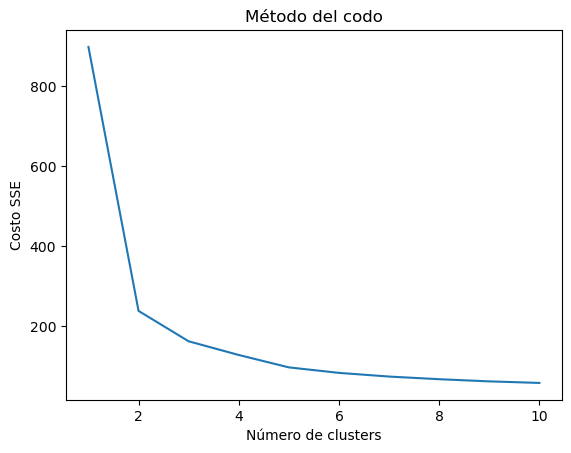

In [18]:
from sklearn.cluster import KMeans
csse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)
plt.plot(range(1, 11), csse)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Costo SSE')
plt.show()

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

etiquetas = kmeans.labels_

# cuántas muestras fueron etiquetadas correctamente

correctas = sum(y == etiquetas)

print("Resultado: %d de %d muestras fueron correctamente etiquetadas." % (correctas, y.size))

print('Precisión: {0:0.2f}'. format(correctas/float(y.size)))

Resultado: 63 de 7050 muestras fueron correctamente etiquetadas.
Precisión: 0.01


## Probar con valores distintos de k

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

etiquetas = kmeans.labels_

# cuántas muestras fueron etiquetadas correctamente

correctas = sum(y == etiquetas)

print("Resultado: %d de %d muestras fueron correctamente etiquetadas." % (correctas, y.size))

print('Precisión: {0:0.2f}'. format(correctas/float(y.size)))

Resultado: 138 de 7050 muestras fueron correctamente etiquetadas.
Precisión: 0.02


In [21]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

etiquetas = kmeans.labels_

# cuántas muestras fueron etiquetadas correctamente

correctas = sum(y == etiquetas)

print("Resultado: %d de %d muestras fueron correctamente etiquetadas." % (correctas, y.size))

print('Precisión: {0:0.2f}'. format(correctas/float(y.size)))

Resultado: 4340 de 7050 muestras fueron correctamente etiquetadas.
Precisión: 0.62


In [22]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

etiquetas = kmeans.labels_

# cuántas muestras fueron etiquetadas correctamente

correctas = sum(y == etiquetas)

print("Resultado: %d de %d muestras fueron correctamente etiquetadas." % (correctas, y.size))

print('Precisión: {0:0.2f}'. format(correctas/float(y.size)))

Resultado: 82 de 7050 muestras fueron correctamente etiquetadas.
Precisión: 0.01


## Visualización
### Escojamos 2 características: status_type y num_comments y analicemos como resulta la agrupación con base en ellas.

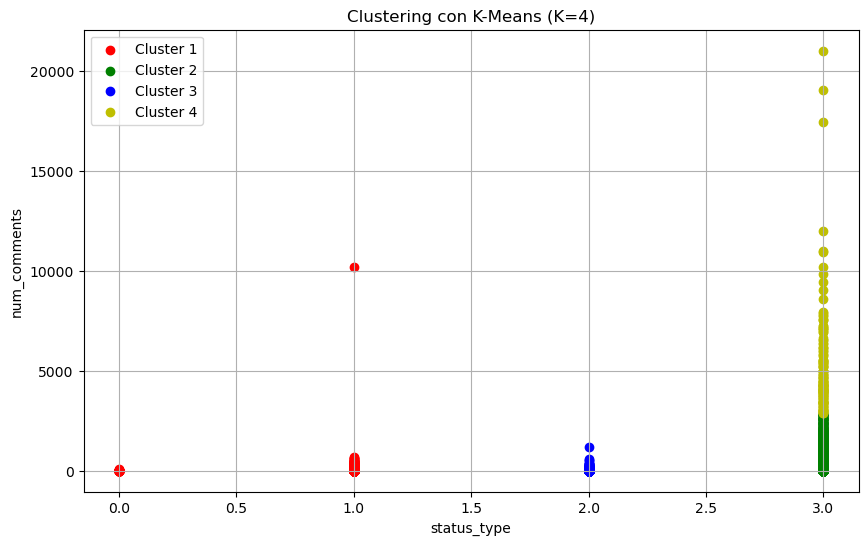

['video' 'photo' 'link' 'status']


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X_sel = X.iloc[:, [0, 2]]  

X_sel = X_sel.to_numpy()

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_sel)

etiquetas = kmeans.labels_

X_sel_escala_original = ms.inverse_transform(X)[:, [0, 2]]

plt.figure(figsize=(10, 6))

colores = ['r', 'g', 'b', 'y']

for i in range(4):
    plt.scatter(X_sel_escala_original[etiquetas == i, 0], X_sel_escala_original[etiquetas == i, 1], c=colores[i], label=f'Cluster {i+1}')

plt.title('Clustering con K-Means (K=4)')
plt.xlabel('status_type')
plt.ylabel('num_comments')
plt.legend()
plt.grid(True)
plt.show()
print(Etiquetas_ST)

### Ahora escojamos 3 características: status_type, num_comments y num_likes

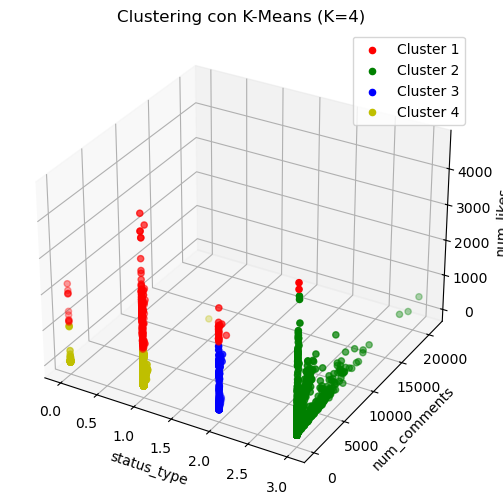

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X_sel = X[['status_type', 'num_comments', 'num_likes']]

X_sel_escala_original = ms.inverse_transform(X)[:, [0, 2, 4]]

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_sel)

etiquetas = kmeans.labels_

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colores = ['r', 'g', 'b', 'y']

for i in range(4):
    ax.scatter(X_sel_escala_original[etiquetas == i, 0], 
               X_sel_escala_original[etiquetas == i, 1],
               X_sel_escala_original[etiquetas == i, 2],
               c=colores[i], label=f'Cluster {i+1}')

ax.set_title('Clustering con K-Means (K=4)')
ax.set_xlabel('status_type')
ax.set_ylabel('num_comments')
ax.set_zlabel('num_likes')
ax.legend()
plt.show()
